## Effects of Epsilon-Sensitivity on PO and SO Calculations

Depending on the magnitude of the performative effects for the DD linear regression game, it is possible that the closed form solutions for the PO and SO break down. Here we are testing how the solutions change with the epsilon sensitivity parameter of the location family distribution map.

In [1]:
import numpy as np
import sys
import ipdb

sys.path.append("../")

sys.path.append("../utils/")
from utils_functions import *

from dd_game import *
from two_stage_player import *

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

np.random.seed(46)

In [2]:
d_1 = 2  # Dimension of each player's data/strategy
d_2 = 2

epsilon_1 = 1  # Epsilon sensitivity parameters
epsilon_2 = 1

Sigma_x_p1 = np.eye(d_1)  # Covariance of x^k
Sigma_x_p2 = np.eye(d_2)

sigma_y_p1 = 0.01  # Variance of y^k
sigma_y_p2 = 0.01

beta_p1 = np.random.normal(size=d_1)  # Linear parameter vector
beta_p2 = np.random.normal(size=d_2)

s_1 = sample_sphere(epsilon_1,d_1+d_2)  # Performativity parameters
mu_p1 = s_1[0:d_1]
gamma_p1 = s_1[d_1:]
s_2 = sample_sphere(epsilon_2,d_1+d_2)
mu_p2 = s_2[0:d_2]
gamma_p2 = s_2[d_2:]

epsilon = 0.0
epsilon = 0.07894736842105263
epsilon = 0.15789473684210525
epsilon = 0.23684210526315788
epsilon = 0.3157894736842105
epsilon = 0.39473684210526316
epsilon = 0.47368421052631576
epsilon = 0.5526315789473684
epsilon = 0.631578947368421
epsilon = 0.7105263157894737
epsilon = 0.7894736842105263
epsilon = 0.8684210526315789
epsilon = 0.9473684210526315
epsilon = 1.026315789473684
epsilon = 1.1052631578947367
epsilon = 1.1842105263157894
epsilon = 1.263157894736842
epsilon = 1.3421052631578947
epsilon = 1.4210526315789473
epsilon = 1.5


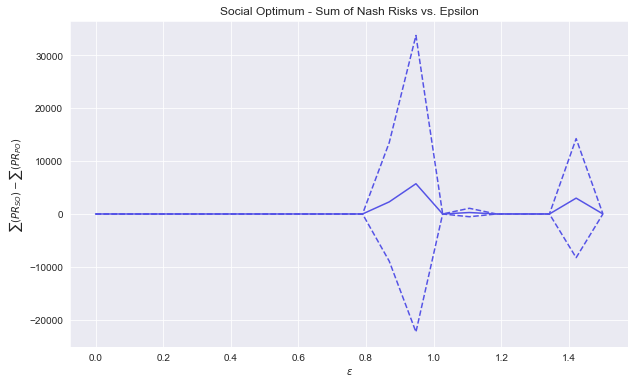

In [3]:
eps_range = np.linspace(0,1.5,20)
N = 25
PO_avg_ = []
SO_avg_ = []
PR_var_ = []

for epsilon in eps_range:
    print(f'epsilon = {epsilon}')
    PO_risk_ = []
    SO_risk_ = []
    for i in range(N):
        epsilon_1 = epsilon
        epsilon_2 = epsilon
        
        beta_p1 = np.random.normal(size=d_1)  # Linear parameter vector
        beta_p2 = np.random.normal(size=d_2)

        s_1 = sample_sphere(epsilon_1,d_1+d_2)  # Performativity parameters
        mu_p1 = s_1[0:d_1]
        gamma_p1 = s_1[d_1:]
        s_2 = sample_sphere(epsilon_2,d_1+d_2)
        mu_p2 = s_2[0:d_2]
        gamma_p2 = s_2[d_2:]
        
        p1_data_params = (Sigma_x_p1, sigma_y_p1, beta_p1, mu_p1, gamma_p1)
        p1_data_generating_func = sample_from_location_family
        p2_data_params = (Sigma_x_p2, sigma_y_p2, beta_p2, mu_p2, gamma_p2)
        p2_data_generating_func = sample_from_location_family
        player_two = TwoStagePlayer()
        player_one = TwoStagePlayer()
        num_rounds = 100000
        num_alternate_rounds = 25
        num_test = 500
        
        game = DecisionDependentGame(player_one, player_two,
                                     p1_data_params, p2_data_params,
                                     p1_data_generating_func, p2_data_generating_func,
                                     num_rounds, num_alternate_rounds, num_test)
        
        game.theta_p1, game.theta_p2 = game.solve_nash()
        PO_risk_.append(game.evaluate_test_perf_risk_p1()
                        + game.evaluate_test_perf_risk_p2())
        
#         print(f'Player 1 PO = {PO_1.round(3)}\tPlayer 2 PO = {PO_2.round(3)}')
        
        game.theta_p1, game.theta_p2 = game.solve_social_opt()
        SO_risk_.append(game.evaluate_test_perf_risk_p1()
                        + game.evaluate_test_perf_risk_p2())
#         print(f'Player 1 SO = {SO_1.round(3)}\tPlayer 2 SO = {SO_2.round(3)}')
    
    PO_avg_.append(np.mean(PO_risk_))
    SO_avg_.append(np.mean(SO_risk_))
    PR_var_.append(np.var(np.array(SO_risk_)-np.array(PO_risk_)))
    
plt.figure(figsize=(10,6))
plt.plot(eps_range,np.array(SO_avg_)-np.array(PO_avg_),
         color='#5553E6')
plt.plot(eps_range,np.array(SO_avg_)-np.array(PO_avg_) + (np.sqrt(PR_var_)),
        '--', color='#5553E6')
plt.plot(eps_range,np.array(SO_avg_)-np.array(PO_avg_) - (np.sqrt(PR_var_)),
        '--', color='#5553E6')
plt.title('Social Optimum - Sum of Nash Risks vs. Epsilon')
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'$\sum(PR_{SO})-\sum(PR_{PO})$')
plt.show()

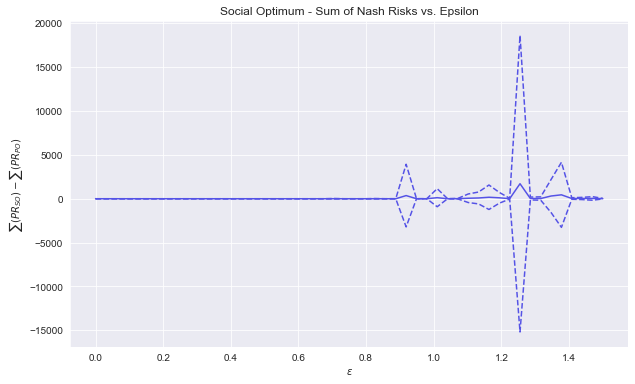

In [4]:
eps_range = np.linspace(0,1.5,50)
N = 100
PO_avg_ = []
SO_avg_ = []
PR_var_ = []

for epsilon in eps_range:
#     print(f'epsilon = {epsilon}')
    PO_risk_ = []
    SO_risk_ = []
    for i in range(N):
        epsilon_1 = epsilon
        epsilon_2 = epsilon
        
        beta_p1 = np.random.normal(size=d_1)  # Linear parameter vector
        beta_p2 = np.random.normal(size=d_2)

        s_1 = sample_sphere(epsilon_1,d_1+d_2)  # Performativity parameters
        mu_p1 = s_1[0:d_1]
        gamma_p1 = s_1[d_1:]
        s_2 = sample_sphere(epsilon_2,d_1+d_2)
        mu_p2 = s_2[0:d_2]
        gamma_p2 = s_2[d_2:]
        
        p1_data_params = (Sigma_x_p1, sigma_y_p1, beta_p1, mu_p1, gamma_p1)
        p1_data_generating_func = sample_from_location_family
        p2_data_params = (Sigma_x_p2, sigma_y_p2, beta_p2, mu_p2, gamma_p2)
        p2_data_generating_func = sample_from_location_family
        player_two = TwoStagePlayer()
        player_one = TwoStagePlayer()
        num_rounds = 100000
        num_alternate_rounds = 25
        num_test = 1000
        
        game = DecisionDependentGame(player_one, player_two,
                                     p1_data_params, p2_data_params,
                                     p1_data_generating_func, p2_data_generating_func,
                                     num_rounds, num_alternate_rounds, num_test)
        
        game.theta_p1, game.theta_p2 = game.solve_nash()
        PO_1, PO_2 = game.evaluate_closed_perf_risk()
        PO_risk_.append(PO_1 + PO_2)
        
#         print(f'Player 1 PO = {PO_1.round(3)}\tPlayer 2 PO = {PO_2.round(3)}')
        
        game.theta_p1, game.theta_p2 = game.solve_social_opt()
        SO_1, SO_2 = game.evaluate_closed_perf_risk()
        SO_risk_.append(SO_1 + SO_2)
#         print(f'Player 1 SO = {SO_1.round(3)}\tPlayer 2 SO = {SO_2.round(3)}')
    
    PO_avg_.append(np.mean(PO_risk_))
    SO_avg_.append(np.mean(SO_risk_))
    PR_var_.append(np.var(np.array(SO_risk_)-np.array(PO_risk_)))

plt.figure(figsize=(10,6))
plt.plot(eps_range,np.array(SO_avg_)-np.array(PO_avg_),
         color='#5553E6')
plt.plot(eps_range,np.array(SO_avg_)-np.array(PO_avg_) + (np.sqrt(PR_var_)),
        '--', color='#5553E6')
plt.plot(eps_range,np.array(SO_avg_)-np.array(PO_avg_) - (np.sqrt(PR_var_)),
        '--', color='#5553E6')
plt.title('Social Optimum - Sum of Nash Risks vs. Epsilon')
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'$\sum(PR_{SO})-\sum(PR_{PO})$')
plt.show()